# Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

In [2]:
np.set_printoptions(precision=4)

# Illustration of Python lists vs. Numpy arrays

In [3]:
print("Python list operations:")
a = [1,2,3]
b = [4,5,6]
print("a+b:", a + b)
try:
    print(a * b)
except TypeError:
    print("a*b has no meaning for Python lists")
print()
print("Numpy array operations:")
a = np.array([1,2,3])
b = np.array([4,5,6])
print("a+b:", a + b)
print("a*b:", a * b)

Python list operations:
a+b: [1, 2, 3, 4, 5, 6]
a*b has no meaning for Python lists

Numpy array operations:
a+b: [5 7 9]
a*b: [ 4 10 18]


In [4]:
print(a)

[1 2 3]


In [5]:
a = np.array([[1,2,3],
              [4,5,6]]) 
print(a)

[[1 2 3]
 [4 5 6]]


In [6]:
b = np.array([10,20,30])
print("a + b:\n", a + b)

a + b:
 [[11 22 33]
 [14 25 36]]


In [12]:
print(np.dot(a,b))

[140 320]


In [13]:
print('a:')
print(a)
print('a.sum(axis=0):', a.sum(axis=0))
print('a.sum(axis=1):', a.sum(axis=1))

a:
[[1 2 3]
 [4 5 6]]
a.sum(axis=0): [5 7 9]
a.sum(axis=1): [ 6 15]


# Basic functions

In [14]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)

In [15]:
# IMG_FOLDER_PATH = '/Users/seth/development/01_deep-learning-from-scratch/images/01_foundations/'
# PDF_IMG_FOLDER_PATH = '/Users/seth/development/01_deep-learning-from-scratch/pdf_images/01_foundations/'

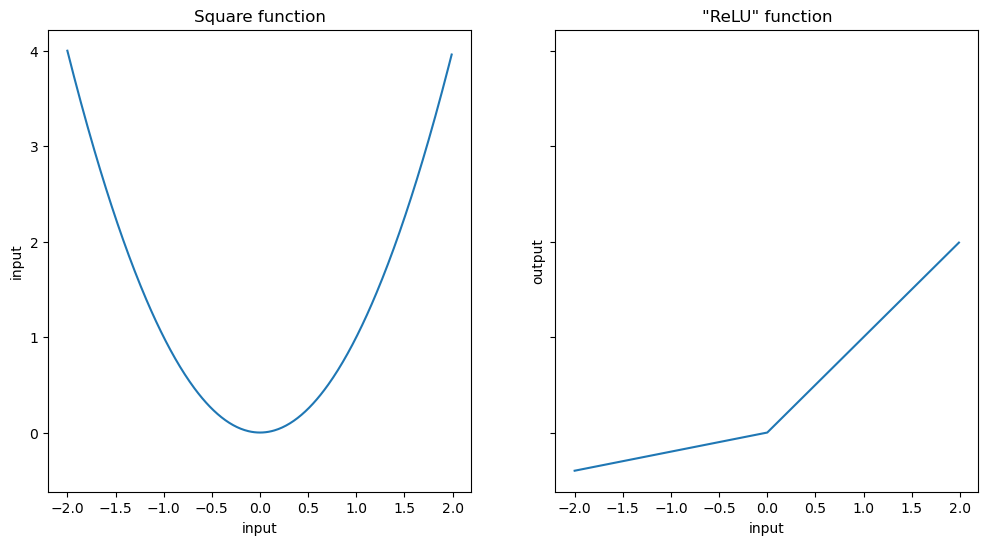

In [18]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
#ax[0].plot(input_range, square(input_range))
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('input')

#ax[1].plot(input_range, leaky_relu(input_range))
ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output');
# plt.savefig(IMG_FOLDER_PATH + "01_two_functions.png")
# plt.savefig(PDF_IMG_FOLDER_PATH + "01_two_functions.pdf")

# Derevatives

In [19]:
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

# Chain

In [20]:
from typing import List

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]

In [21]:
def chain_length_2(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))

# Chain derivative

In [22]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input Tensor.
    '''
    return np.power(x, 2)

def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input ndarray.
    '''
    return 1 / (1 + np.exp(-x))

In [23]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du

In [24]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - 
    Across the input_range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [25]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of a function consisting of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

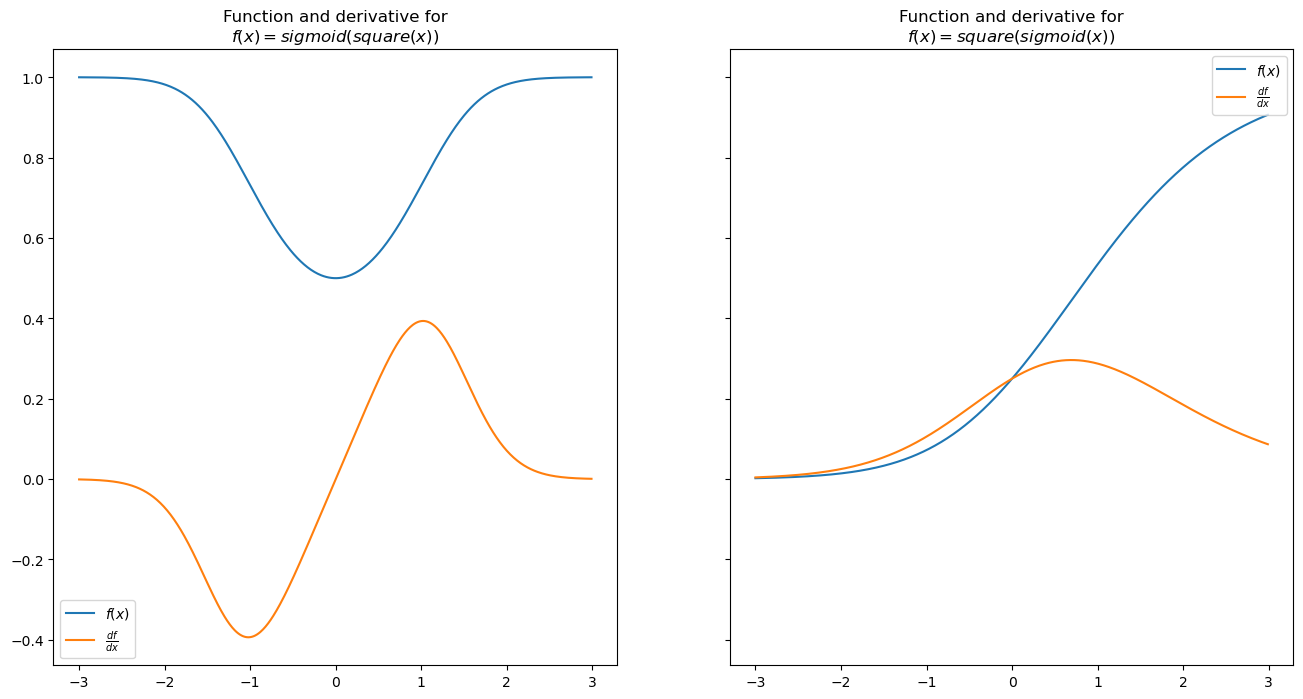

In [26]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

# plt.savefig(IMG_FOLDER_PATH + "08_plot_chain_rule_1.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "08_plot_chain_rule_1.pdf");

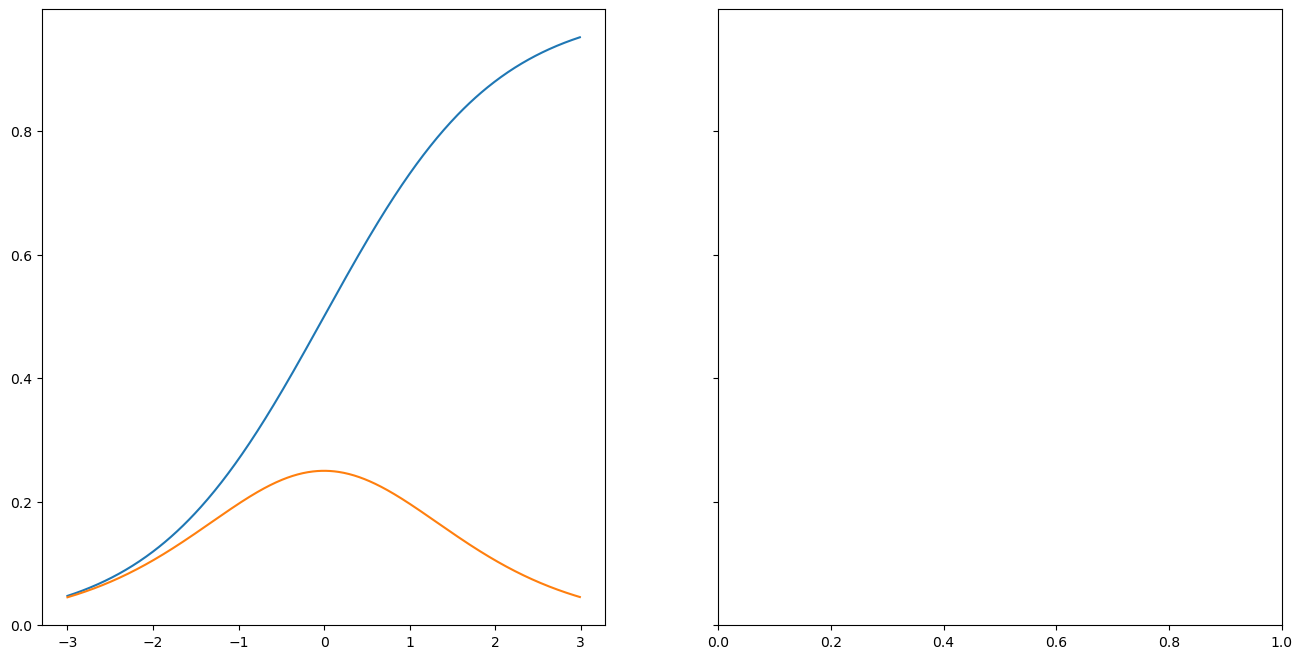

In [37]:
fig3, ax3 = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

def tetra(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 4)

def empty(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return x

chain_3 = [sigmoid, empty]

plot_chain(ax3[0], chain_3, PLOT_RANGE)

plot_chain_deriv(ax3[0], chain_3, PLOT_RANGE)

# Chain of length 3

In [38]:
def chain_length_3(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain".
    '''
    assert len(chain) == 3, \
    "Length of input 'chain' should be 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))

In [39]:
def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input_range)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # df3du
    df3du = deriv(f3, f2_of_x)

    # df2du
    df2du = deriv(f2, f1_of_x)

    # df1dx
    df1dx = deriv(f1, input_range)

    # Multiplying these quantities together at each point
    return df1dx * df2du * df3du

In [40]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)

def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply "sigmoid" function to each element in ndarray
    '''
    return 1 / (1 + np.exp(-x))

In [41]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray,
               length: int=2) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - across one range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

In [42]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)

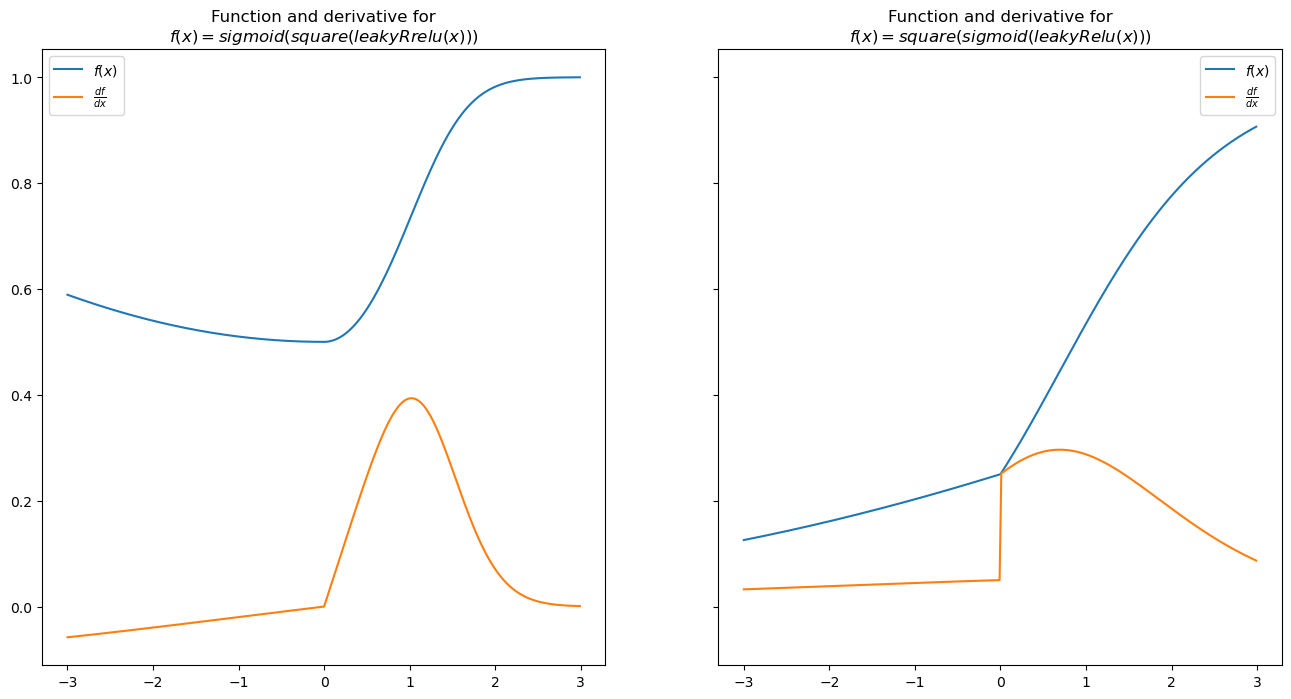

In [43]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRrelu(x)))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$");

# plt.savefig(IMG_FOLDER_PATH + "09_plot_chain_rule_2.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "09_plot_chain_rule_2.pdf");

# Function with multiple inputs example

In [44]:
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    '''
    Function with multiple inputs and addition, forward pass
    '''
    assert x.shape == y.shape

    a = x + y
    return sigma(a)

In [45]:
def multiple_inputs_add_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float:
    '''
    Computes the derivative of this simple function with respect to
    both inputs
    '''
    # Compute "forward pass"
    a = x + y

    # Compute derivatives
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady

# Function with matrix multiplication

In [46]:
def matmul_forward(X: ndarray,
                   W: ndarray) -> ndarray:
    '''
    Computes the forward pass of a matrix multiplication
    '''
    
    assert X.shape[1] == W.shape[0], \
    '''
    For matrix multiplication, the number of columns in the first array should match the
    number of rows in the second, instead the number of columns in the first array is {0}
    and the number of rows in the second array is {1}
    '''.format(X.shape[1], W.shape[0])

    # matrix multiplication
    N = np.dot(X, W)

    return N

In [47]:
def matmul_backward_first(X: ndarray,
                          W: ndarray) -> ndarray:
    '''
    Computes the backward pass of a matrix multiplication with respect to the first argument.
    '''

    # backward pass
    dNdX = np.transpose(W, (1, 0))

    return dNdX

In [48]:
np.random.seed(190203)

X = np.random.randn(1,3)
W = np.random.randn(3,1)

print(X)
matmul_backward_first(X, W)

[[ 0.4723  0.6151 -1.7262]]


array([[ 0.9282, -0.6075, -1.2214]])

In [49]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function) -> ndarray:
    '''
    Computes the forward pass of a function involving matrix multiplication, one extra function
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    return S


Derivative of a function with matrix multiplication

If:

is is Then will be

:

If the derivative of a loss with respect to each output
is

, then

(np.dot((m,p), (p,n)) = m x n

    (np.dot((n,m), (m,p)) = n x p

In particular, the matrix multiplication on the backward pass must be done in this order

In [50]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of our matrix function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

In [51]:
print(matrix_function_backward_1(X, W, sigmoid))

[[ 0.0852 -0.0557 -0.1121]]


In [52]:
def forward_test(ind1, ind2, inc):
    
    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc

    return matrix_forward_extra(X1, W, sigmoid)

In [74]:
(np.round(forward_test(0, 2, 0.01) - forward_test(0, 2, 0), 4)) / 0.01

array([[-0.11]])

In [75]:


np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 3)



-0.112

# Matrix function with sum

In [76]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [77]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of this function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W.transpose(0, 1))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

# Matrix function with two 2D matrices

In [78]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [79]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    '''
    Compute derivative of matrix function with a sum with respect to the
    first matrix input
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    # note: I'll refer to the derivatives by their quantities here,
    # unlike the math where we referred to their function names

    # dLdS - just 1s
    dLdS = np.ones_like(S)

    # dSdN
    dSdN = deriv(sigma, N)
    
    # dLdN
    dLdN = dLdS * dSdN

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # dLdX
    dLdX = np.dot(dSdN, dNdX)

    return dLdX

Testing

In [81]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X:")
print(X)

print("W:")
print(W)

print("L:")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print()
print("dLdX:")
print(matrix_function_backward_sum_1(X, W , sigmoid))

X:
[[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]
W:
[[ 0.7551  0.2556]
 [-0.5611 -0.975 ]
 [ 0.981  -0.9587]]
L:
2.3755

dLdX:
[[ 0.2489 -0.3748  0.0112]
 [ 0.126  -0.2781 -0.1395]
 [ 0.2299 -0.3662 -0.0225]]


In [86]:
X1 = X.copy()
X1[0, 0] += 0.001

print(round(
        (matrix_function_forward_sum(X1, W, sigmoid) - \
         matrix_function_forward_sum(X, W, sigmoid)) / 0.001, 4))

-0.2489


Plotting

In [87]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function,
                                modify_x11: bool = False,
                                x11: float = 0.5) -> float:
    '''
    Computing the result of the forward pass of this function with
    input Tensors X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]
    
    if modify_x11:
        X1 = X.copy()
        X1[0][0] = x11

    # matrix multiplication
    N = np.dot(X1, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [88]:
print("X:")
print(X)

X:
[[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]


In [89]:
x11s = np.arange(X[0][0] - 1, X[0][0] + 1, 0.01)
Ls = [matrix_function_forward_sum(X, W, sigmoid,
                                  modify_x11 = True,
                                  x11=x11) for x11 in x11s]

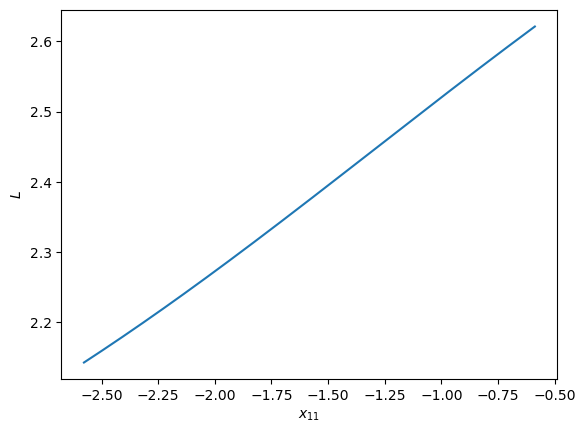

In [90]:
plt.plot(x11s, Ls);
# plt.title("Value of $L$ as $x_{11}$ changes holding\nother values of $X$ and $W$ constant")
plt.xlabel("$x_{11}$")
plt.ylabel("$L$");
# plt.savefig(IMG_FOLDER_PATH + "18_x11_vs_L.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "18_x11_vs_L.pdf");